In [11]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import extract_H_T, read_train_val_loss

In [14]:
def analyse(exp_dir: str ='exp', model: str ='dlinear', data: str ='1d'):
    data_dir = os.path.join(exp_dir, model, data)

    h = []
    t = []
    val_mse = []
    train_mse = []

    for ht_dir_name in os.listdir(data_dir):
        ht_dir_path = os.path.join(data_dir, ht_dir_name)
        H,T = extract_H_T(ht_dir_name)

        train_losses, val_losses = read_train_val_loss(ht_dir_path)

        h.append(H)
        t.append(T)
        val_mse.append(min(val_losses))
        train_mse.append(min(train_losses))

    df = pd.DataFrame({
        'H': h,
        'T': t,
        'val_mse': val_mse,
        'train_mse': train_mse
    })

    sns.scatterplot(df, x='H', y='T', size='val_mse', sizes=(20,200), legend=False)
    plt.show()

    df.sort_values(by='T')
    sns.catplot(df, x='T', y='val_mse', hue='H', kind='bar', palette='rocket')
    plt.show()
    

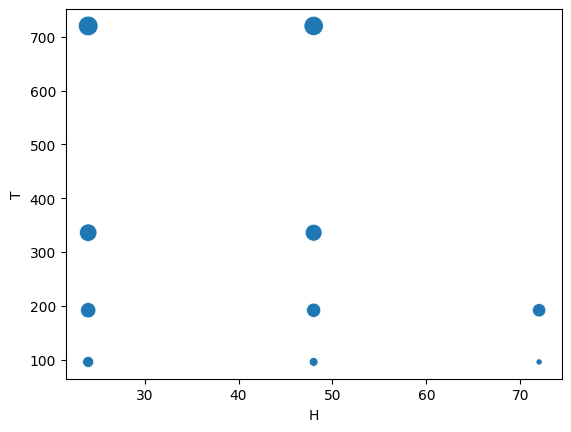

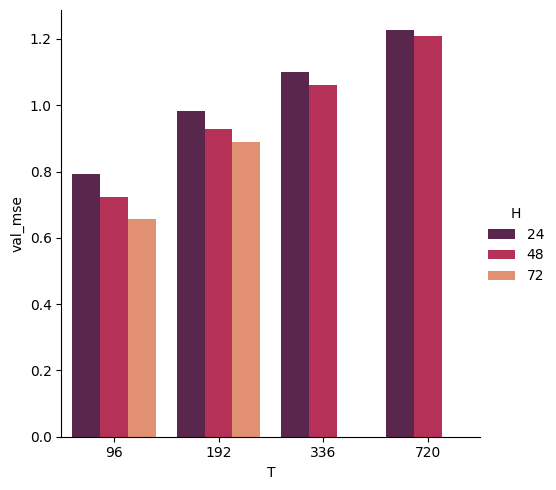

In [15]:
analyse()